# Consumption vs production chronologies

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">RAAD form frequency per year in types/site date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Site count per year in types/site date ranges</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">RAAD type number count per year in types/site date ranges</span>](#5)  <a id="five"></a>  
6. [<span style="color:black">Plot line graphs</span>](#6) <a id="six"></a> 

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../../src")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import year_object_count_df, sum_freq_per_year, year_freq_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../data/RAAD_data_restructured.csv")
data["origin_h2"] = data["origin_h2"].fillna('')

In [3]:
start_dates = ["raad_type_start_date", "site_start_date"]
end_dates = ["raad_type_end_date", "site_end_date"]

freq_dates = {}
site_count_dates = {}
form_count_dates = {}

list_of_dfs = []

### [<span style="color:black">3. RAAD form frequency per year in types/site date ranges</span>](#three) <a id="3"></a>

In [4]:
for start, end in zip(start_dates, end_dates):

    df = data.groupby(["RAAD_form", start, end])["frequency"].sum()
    df = df.reset_index()
    df = df.rename(columns = {"frequency":"summed_freq"})

    df1 = sum_freq_per_year(data = df,
                            sum_freq = "summed_freq",
                            lower_date = start,
                            upper_date = end)

    freq = year_freq_df(data = df1,     
                        lower_date =  start,
                        upper_date = end,
                        sum_freq = "Sum_freq_per_year")   
    
    if "raad" in start or "raad" in end: 
        key = "Type dates"  
    else:
        key = "Site dates" 
    freq_dates[key] = freq
        
list_of_dfs.append(freq_dates)

### [<span style="color:black">4. Site count per year in types/site date ranges</span>](#four) <a id="4"></a>  

In [5]:
for start, end in zip(start_dates, end_dates):

    df = data.groupby(["RAAD_form", start, end])["site_name_modern"].apply(lambda x: ",".join(x))
    df = df.apply(lambda x: x.split(','))
    df = df.reset_index()
    df = df.rename(columns = {"site_name_modern":"List_of_sites"})
    
    count_values = year_object_count_df(data = df, 
                                        lower_date = start,  
                                        upper_date = end,
                                        object_list = "List_of_sites") 

    if "raad" in start or "raad" in end: 
        key = "Type dates"  
    else:
        key = "Site dates" 
    site_count_dates[key] = count_values
        
list_of_dfs.append(site_count_dates)              

### [<span style="color:black">5. RAAD type number count per year in types/site date ranges</span>](#five) <a id="5"></a>

In [6]:
for start, end in zip(start_dates, end_dates):
    df = data.groupby(["RAAD_form", start, end])["RAAD_type_number"].apply(list)
    df = df.reset_index()
    df = df.rename(columns = {"RAAD_type_number":"List_of_numbers"})
    
    num_count = year_object_count_df(data = df,  
                                     lower_date = start,  
                                     upper_date = end,
                                     object_list = "List_of_numbers")  

    if "raad" in start or "raad" in end: 
        key = "Type dates"  
    else:
        key = "Site dates" 
    form_count_dates[key] = num_count
        
list_of_dfs.append(form_count_dates)      

### [<span style="color:black">6. Plot line graphs</span>](#six) <a id="6"></a>

/tmp/ipykernel_10058/3430456416.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_10058/3430456416.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_10058/3430456416.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


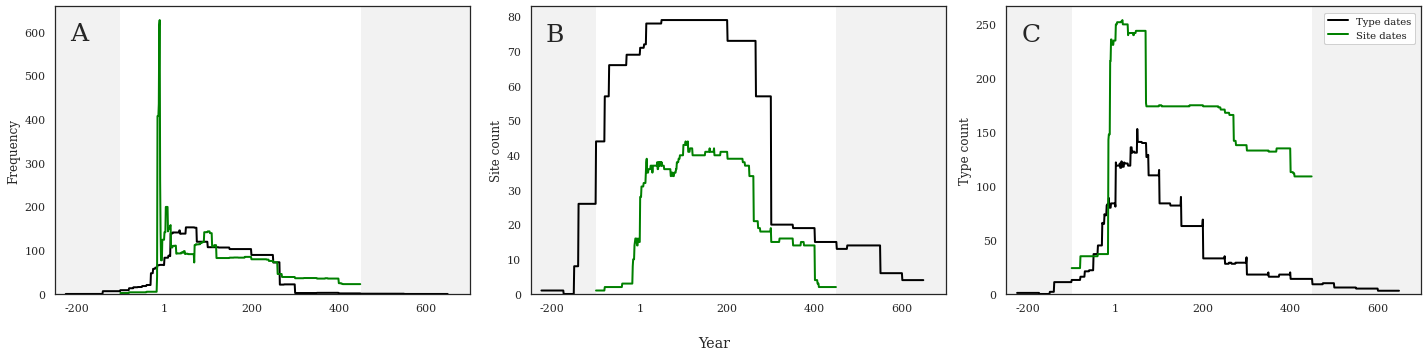

In [11]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_xlim([-250, 700])
axs[1].set_xlim([-250, 700])
axs[2].set_xlim([-250, 700])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["black", "green"],
               ax = ax,
               linewidth = 2)

    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, bbox_to_anchor=(0.99, 0.96), fontsize = 10)
    ax.axvspan(-250, -100, color='grey', alpha=0.1, lw=0)
    ax.axvspan(450, 700, color='grey', alpha=0.1, lw=0)

axs[2].set_ylabel("Type count")
fig.supxlabel("Year")
axs[0].text(-215, 581, "A", fontsize = 25)
axs[1].text(-215, 73, "B", fontsize = 25)
axs[2].text(-215, 234, "C", fontsize = 25)

plt.tight_layout()
plt.savefig("Figs/Fig2.tiff", bbox_inches="tight", format = "tiff", dpi = 400)